In [75]:
# IRkernel::installspec(user = FALSE)|

In [76]:
library(RColorBrewer)
library(readxl)
library(ggplot2)
library(dplyr)

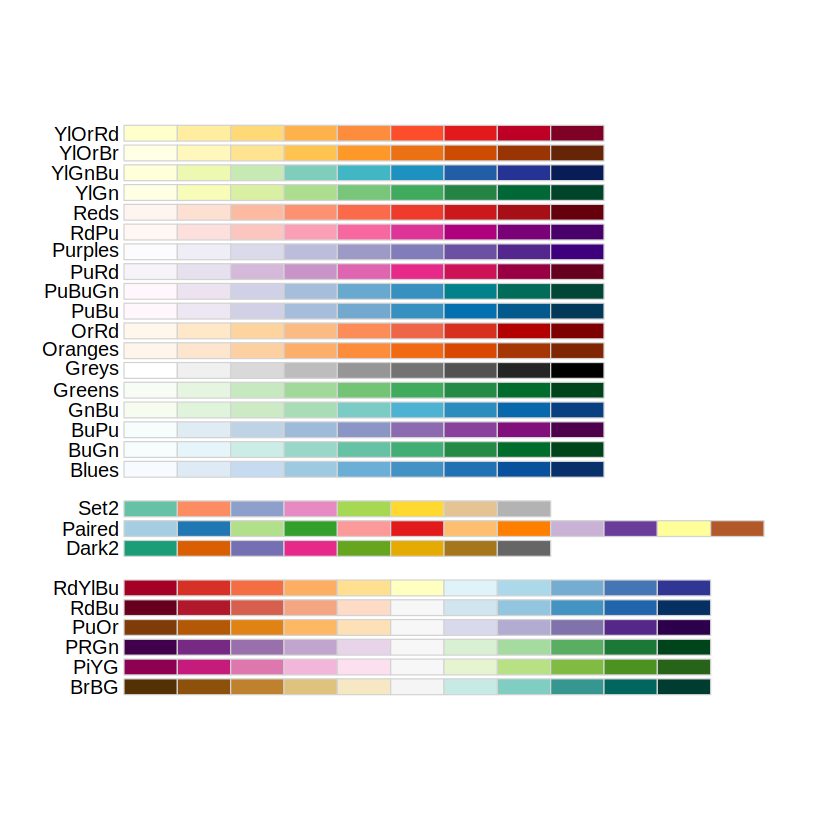

In [77]:
display.brewer.all(colorblindFriendly = TRUE)

In [78]:
# display.brewer.pal(n = 8, name = 'Dark2')
color_map_use = c(RColorBrewer::brewer.pal(8, "Dark2"))

### Common: read data excel

In [79]:
df_original = read_excel("/home/jinhyun/codes/geography_prediction/results/Geography prediction experiments.xlsx", sheet = "results_1M")

In [80]:
names(df_original)

[1] "random_seed"                 "select_method"              
 [3] "select_n"                    "n_dim_reduced"              
 [5] "train_model"                 "hyper_params"               
 [7] "model_params"                "select_cpu_time"            
 [9] "select_wall_time"            "select_memory_usage"        
[11] "train_cpu_time"              "train_wall_time"            
[13] "train_memory_usage"          "testset_accuracy"           
[15] "testset_f1_micro"            "testset_f1_macro"           
[17] "testset_f1_weighted"         "testset_class_BEB_accuracy" 
[19] "testset_class_CDX_accuracy"  "testset_class_CEU_accuracy" 
[21] "testset_class_CHS_accuracy"  "testset_class_CLM_accuracy" 
[23] "testset_class_ESN_accuracy"  "testset_class_FIN_accuracy" 
[25] "testset_class_GWD_accuracy"  "testset_class_IBS_accuracy" 
[27] "testset_class_JPT_accuracy"  "testset_class_KHV_accuracy" 
[29] "testset_class_LWK_accuracy"  "testset_class_MSL_accuracy" 
[31] "testset_class_MXL_accuracy"  "testset_class_PEL_accuracy" 
[33] "testset_class_PJL_accuracy"  "testset_class_PUR_accuracy" 
[35] "testset_class_TSI_accuracy"  "testset_class_YRI_accuracy" 
[37] "valset_accuracy"             "valset_f1_micro"            
[39] "valset_f1_macro"             "valset_f1_weighted"         
[41] "valset_class_BEB_accuracy"   "valset_class_CDX_accuracy"  
[43] "valset_class_CEU_accuracy"   "valset_class_CHS_accuracy"  
[45] "valset_class_CLM_accuracy"   "valset_class_ESN_accuracy"  
[47] "valset_class_FIN_accuracy"   "valset_class_GWD_accuracy"  
[49] "valset_class_IBS_accuracy"   "valset_class_JPT_accuracy"  
[51] "valset_class_KHV_accuracy"   "valset_class_LWK_accuracy"  
[53] "valset_class_MSL_accuracy"   "valset_class_MXL_accuracy"  
[55] "valset_class_PEL_accuracy"   "valset_class_PJL_accuracy"  
[57] "valset_class_PUR_accuracy"   "valset_class_TSI_accuracy"  
[59] "valset_class_YRI_accuracy"   "trainset_accuracy"          
[61] "trainset_f1_micro"           "trainset_f1_macro"          
[63] "trainset_f1_weighted"        "trainset_class_BEB_accuracy"
[65] "trainset_class_CDX_accuracy" "trainset_class_CEU_accuracy"
[67] "trainset_class_CHS_accuracy" "trainset_class_CLM_accuracy"
[69] "trainset_class_ESN_accuracy" "trainset_class_FIN_accuracy"
[71] "trainset_class_GWD_accuracy" "trainset_class_IBS_accuracy"
[73] "trainset_class_JPT_accuracy" "trainset_class_KHV_accuracy"
[75] "trainset_class_LWK_accuracy" "trainset_class_MSL_accuracy"
[77] "trainset_class_MXL_accuracy" "trainset_class_PEL_accuracy"
[79] "trainset_class_PJL_accuracy" "trainset_class_PUR_accuracy"
[81] "trainset_class_TSI_accuracy" "trainset_class_YRI_accuracy"

In [81]:
df = df_original %>% 
  mutate(plot_unit = interaction(random_seed, select_method, train_model))

### Figure 2. Accuracy by n_select and selection method

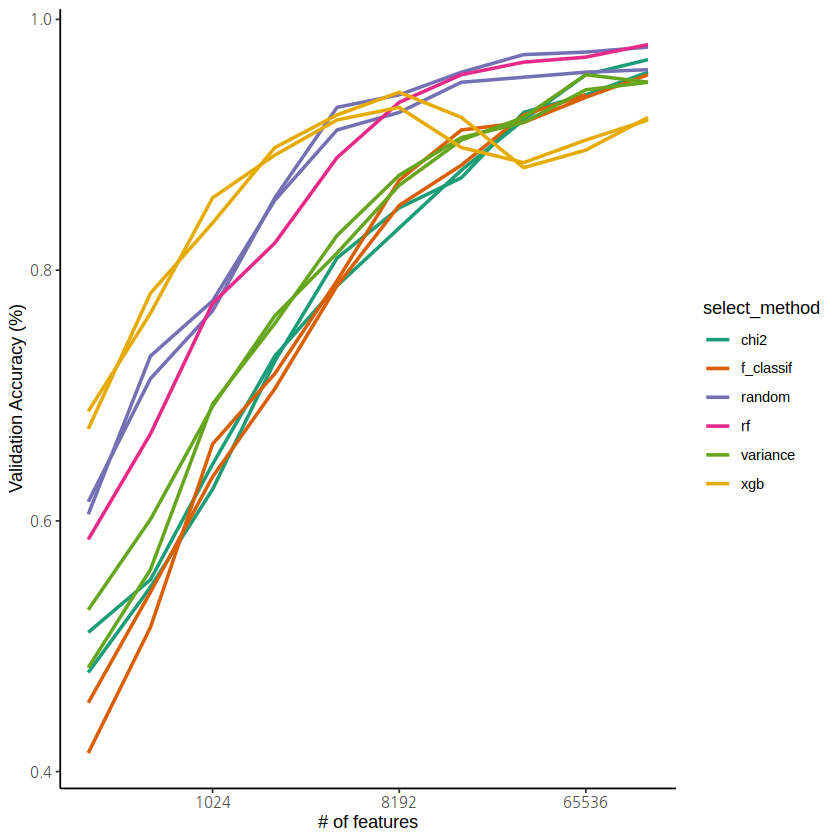

In [82]:
df_for_plot = df %>% 
  filter(train_model == "SVM", 
         # n_dim_reduced == 1024,
         select_n == n_dim_reduced
        )

p = ggplot(data = df_for_plot, aes(x = select_n, y = testset_accuracy, group = plot_unit, colour = select_method)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("Validation Accuracy (%)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  #scale_y_continuous(limits = c(0,1)) +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

#ggsave("processing per cost.pdf", width=11.2, height=8, units = c("cm"), dpi = 300)

Warning message in geom_point(linewidth = 1):
“Ignoring unknown parameters: `linewidth`”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 21 rows containing missing values (`geom_point()`).”


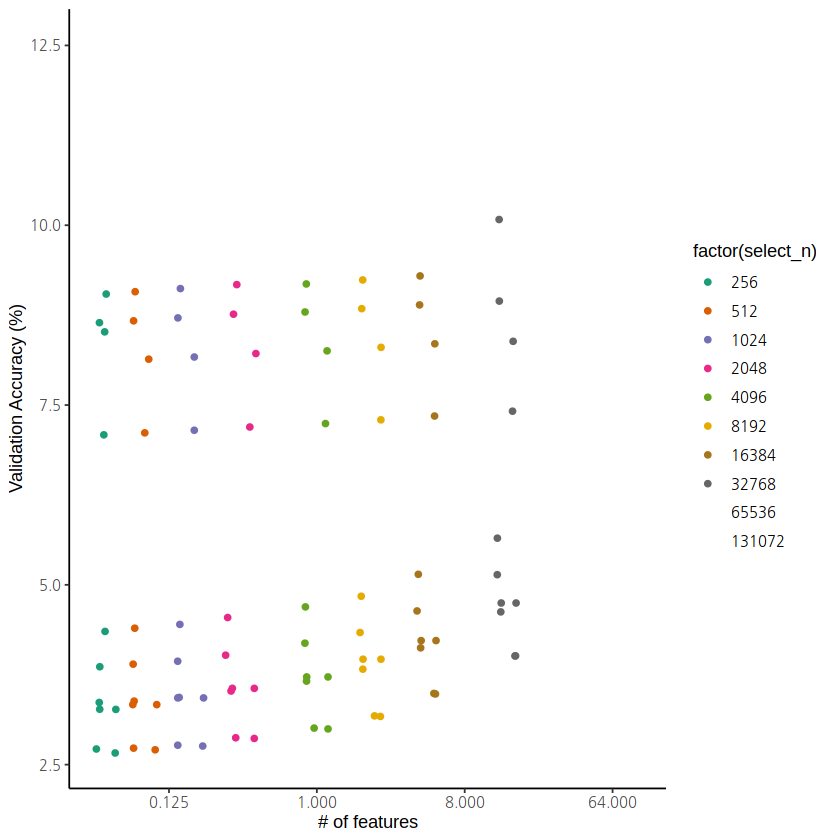

In [72]:
p = ggplot(data = df_for_plot, aes(x = train_cpu_time, y = train_memory_usage, group = plot_unit, colour = factor(select_n))) +
  geom_point(linewidth = 1) +
  xlab("# of features") + 
  ylab("Validation Accuracy (%)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  #scale_y_continuous(limits = c(0,1)) +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

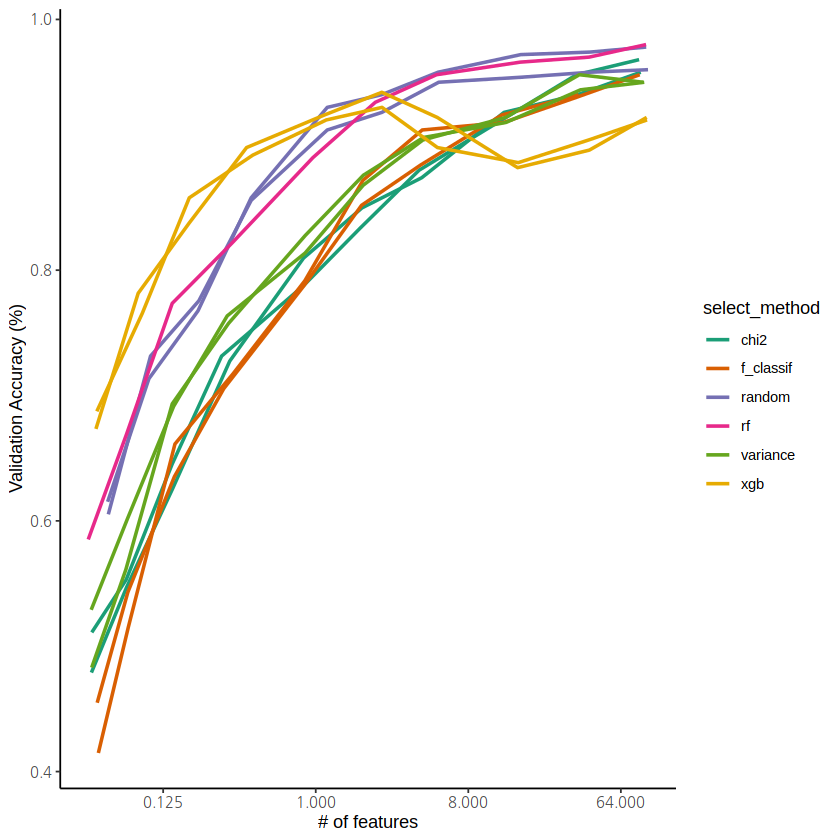

In [74]:
p = ggplot(data = df_for_plot, aes(x = train_cpu_time, y = testset_accuracy, group = plot_unit, colour = select_method)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("Validation Accuracy (%)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  #scale_y_continuous(limits = c(0,1)) +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

In [60]:
df_for_plot$train_cpu_time 

[1]  0.036241  0.059196  0.035256  0.058835  0.105236  0.032851  0.056131
 [8]  0.105631  0.203297  0.030927  0.054784  0.106448  0.212021  0.414976
[15]  0.029284  0.054177  0.109864  0.217844  1.169788  0.027074  0.051793
[22]  0.110285  0.220955  2.463637  0.024840  0.049136  0.109546  0.220709
[29]  5.344013  0.022982  0.046634  0.110190  0.220607 16.475950  0.021189
[36]  0.044039  0.111096  0.216088 42.537510  0.019711  0.041836  0.109354
[43]  0.219750 92.656370

Warning message in geom_point(linewidth = 1):
“Ignoring unknown parameters: `linewidth`”


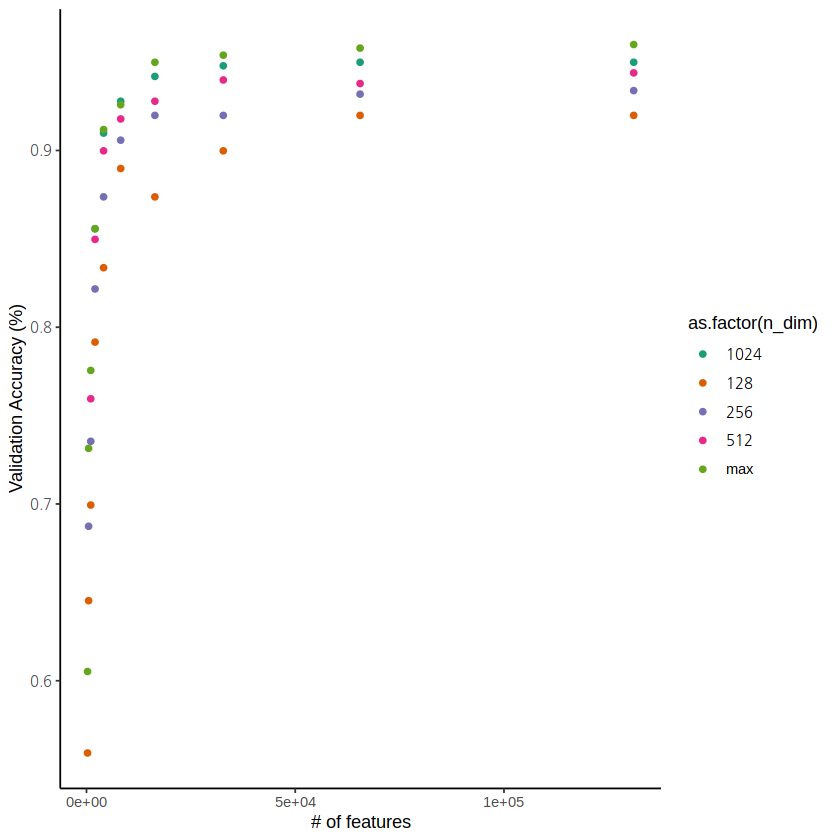

In [59]:
df_for_plot = df %>% 
  filter(train_model == "SVM", 
          select_method == "random",
          random_seed == 1004
        ) %>%
  mutate(n_dim = ifelse(select_n == n_dim_reduced, "max", n_dim_reduced))
p = ggplot(data = df_for_plot, aes(x = select_n, y = testset_accuracy, group = plot_unit, colour = as.factor(n_dim))) +
  geom_point(linewidth = 1) +
  xlab("# of features") + 
  ylab("Validation Accuracy (%)") +
  scale_color_brewer(palette = "Dark2") +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

### Supplementary Fig. Accuracy by train_model

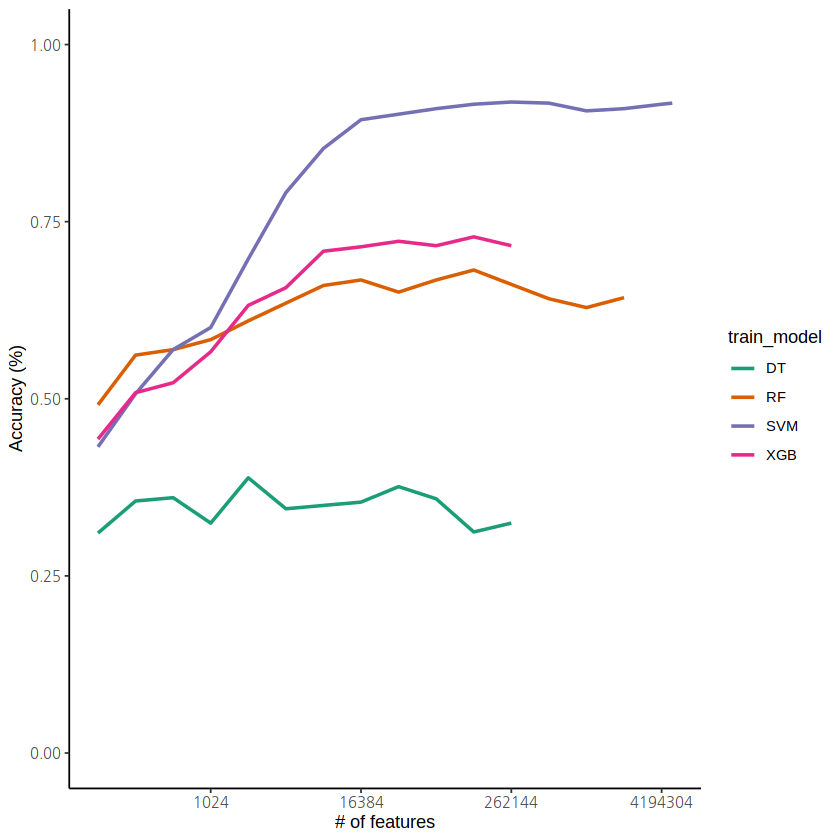

In [32]:
df_for_plot = df %>% filter(select_method == "rf")
p = ggplot(data = df_for_plot, aes(x = select_n, y = accuracy, group = train_model, colour = train_model)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("Accuracy (%)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

### Resources by n_select and method

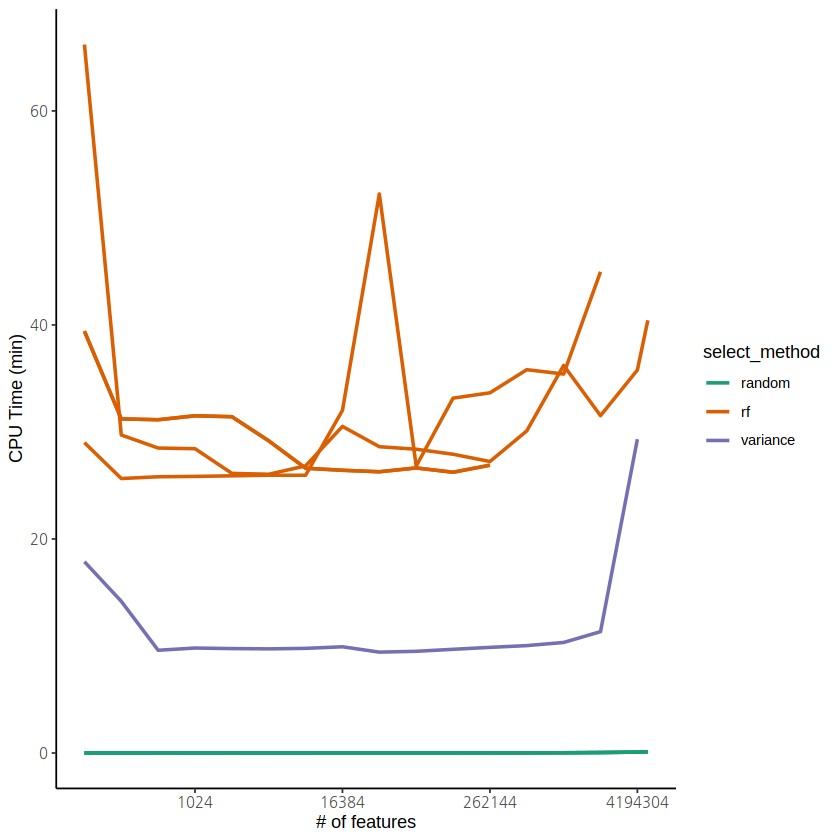

In [34]:
p = ggplot(data = df, aes(x = select_n, y = select_cpu_time, group = plot_unit, colour = select_method)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("CPU Time (min)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

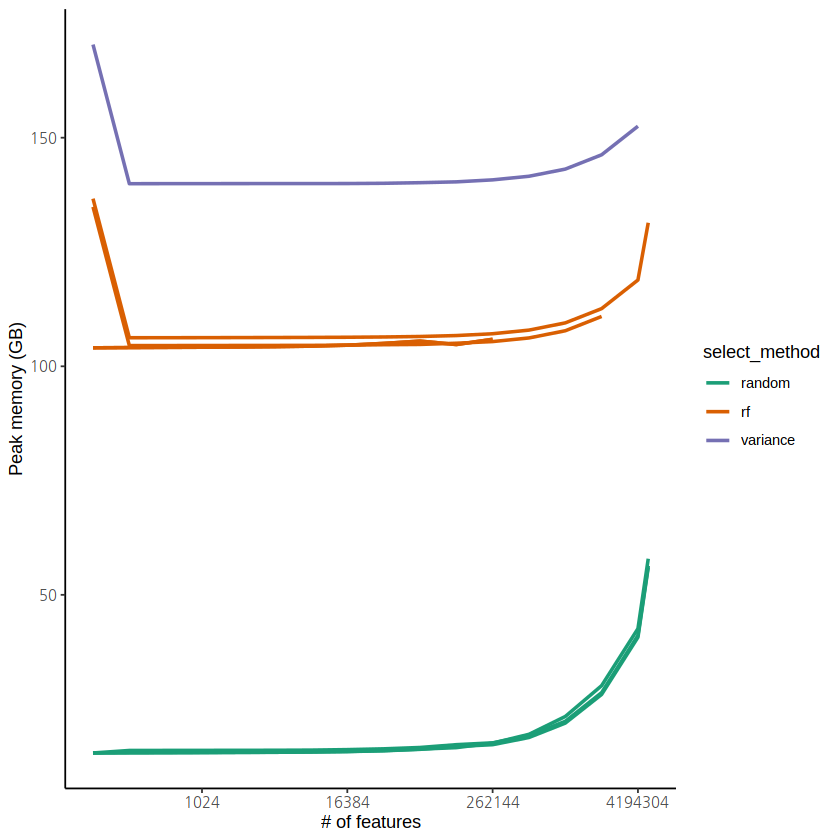

In [36]:
p = ggplot(data = df, aes(x = select_n, y = select_memory_usage, group = plot_unit, colour = select_method)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("Peak memory (GB)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

# Fig 4

In [87]:
df_fig4 = read_excel("/home/jinhyun/codes/geography_prediction/results/Geography prediction experiments.xlsx", sheet = "results_1M_cls")

In [88]:
colnames(df_fig4)

[1] "selected"                       "random_seed"                   
 [3] "class_target"                   "select_n"                      
 [5] "n_dim_reduced"                  "train_model"                   
 [7] "hyper_params"                   "model_params"                  
 [9] "select_cpu_time"                "select_wall_time"              
[11] "select_memory_usage"            "train_cpu_time"                
[13] "train_wall_time"                "train_memory_usage"            
[15] "testset_accuracy"               "testset_f1_micro"              
[17] "testset_f1_macro"               "testset_f1_weighted"           
[19] "testset_class_others_accuracy"  "testset_class_target_accuracy" 
[21] "valset_accuracy"                "valset_f1_micro"               
[23] "valset_f1_macro"                "valset_f1_weighted"            
[25] "valset_class_others_accuracy"   "valset_class_target_accuracy"  
[27] "trainset_accuracy"              "trainset_f1_micro"             
[29] "trainset_f1_macro"              "trainset_f1_weighted"          
[31] "trainset_class_others_accuracy" "trainset_class_target_accuracy"

In [95]:
df_minimum_n_by_cls = df_fig4 %>% group_by(random_seed, class_target) %>%
    mutate(max_f1 = max(testset_f1_macro)) %>%
    filter(testset_f1_macro > (max_f1-0.02)) %>%
    select(selected, class_target, select_n, n_dim_reduced, testset_f1_macro, max_f1) %>%
    summarise(select_n = min(select_n))
df_minimum_n_by_cls %>% write.table("results/minimum_n_by_cls.csv", sep = ",")

Adding missing grouping variables: `random_seed`
`summarise()` has grouped output by 'random_seed'. You can override using the
`.groups` argument.
